# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.

# Processo de verificaçao dos dados
# 1. Verificar a quantidade de linhas e colunas
# 2. Verificar os primeiros registros
# 3. Verificar os tipos de dados
# 4. Verificar informações estatisticas


# 1. Verificar a quantidade de linhas e colunas (ok)
dataframe.shape

(10000, 2)

In [5]:
# 2. Verificar os primeiros registros (ok)

dataframe.head()

normal  binomial
0  21.986857        18
1  19.446943        15
2  22.590754        14
3  26.092119        15
4  19.063387        21

In [6]:
# 3. Verificar os tipos de dados (ok)

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
normal      10000 non-null float64
binomial    10000 non-null int32
dtypes: float64(1), int32(1)
memory usage: 117.3 KB


In [7]:
# 4. Verificar informações estatisticas

dataframe.describe().T

count       mean       std       min        25%       50%  \
normal    10000.0  19.991456  4.013850  4.310399  17.309638  19.98962   
binomial  10000.0  20.097000  4.041191  6.000000  17.000000  20.00000   

                75%        max  
normal    22.684324  35.704951  
binomial  23.000000  36.000000

# Analise exploratória dos dados

### Demonstrando a distribuição dos dados

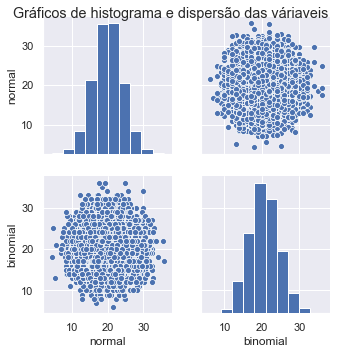

In [8]:
sns.pairplot(data=dataframe)
plt.suptitle('Gráficos de histograma e dispersão das váriaveis')
plt.show()

### Bloxplot: Observar a variação por quartis

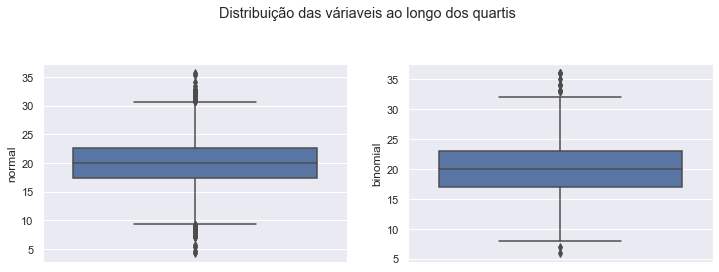

In [9]:
plt.subplot(221)
fig1 = sns.boxplot(dataframe['normal'], orient='v')

plt.subplot(222)
fig2 = sns.boxplot(dataframe['binomial'], orient='v')

plt.suptitle('Distribuição das váriaveis ao longo dos quartis')
plt.show()

# Plotando a função ECDF

In [10]:
# Definition of function
# Ref. https://campus.datacamp.com/courses/statistical-thinking-in-python-part-1/graphical-exploratory-data-analysis?ex=12
def compute_ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

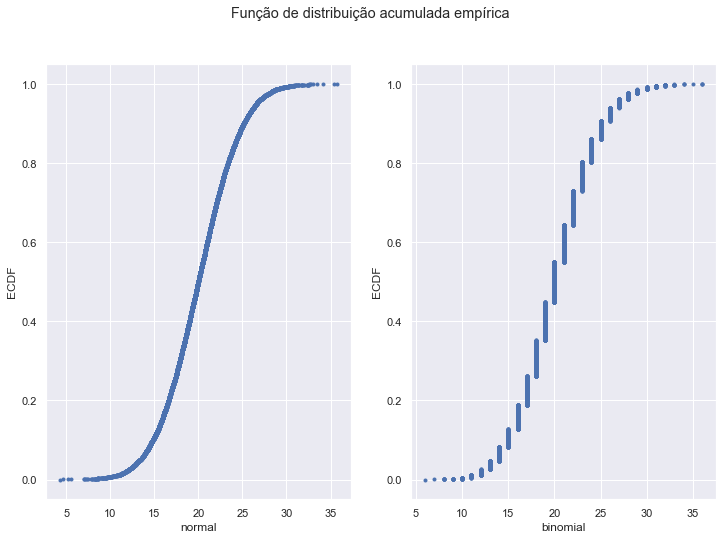

In [11]:
# Calculating series to plot ecdf
x_normal, y_normal = compute_ecdf(dataframe['normal'])
x_binomial, y_binomial = compute_ecdf(dataframe['binomial'])

# Using number of lines equal to 1 and columns 2 for plotting
plt.subplot(1, 2, 1)
ax_normal = plt.plot(x_normal, y_normal, marker='.', linestyle='none')
plt.xlabel('normal')
plt.ylabel('ECDF')

plt.subplot(1, 2, 2)
ax_binomial = plt.plot(x_binomial, y_binomial, marker='.', linestyle='none')
plt.xlabel('binomial')
plt.ylabel('ECDF')

plt.suptitle('Função de distribuição acumulada empírica')
plt.show()

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [12]:
def q1():
    dataframe_stats = dataframe.describe()
    return (round(dataframe_stats['normal']['25%'] - dataframe_stats['binomial']['25%'], 3), 
            round(dataframe_stats['normal']['50%'] - dataframe_stats['binomial']['50%'], 3),
            round(dataframe_stats['normal']['75%'] - dataframe_stats['binomial']['75%'], 3)
    )

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [13]:
def q2():
    normal_mean = dataframe['normal'].mean()
    normal_std = dataframe['normal'].std()
    
    # Calculating the intervals
    interval1 = normal_mean - normal_std
    interval2 = normal_mean + normal_std

    # Values applied to the ECDF function
    interval1 = ECDF(dataframe['normal'])(interval1)
    interval2 = ECDF(dataframe['normal'])(interval2)
    
    return float(round(interval2 - interval1, 3))

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [14]:
def q3():
    binomial_mean, binomial_variance = dataframe['binomial'].mean(), dataframe['binomial'].var()
    normal_mean, normal_variance = dataframe['normal'].mean(), dataframe['normal'].var()
    
    return (round(binomial_mean - normal_mean, 3), round(binomial_variance - normal_variance, 3))

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [15]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [16]:
# Sua análise da parte 2 começa aqui.
# Processo de verificaçao dos dados
# 1. Verificar a quantidade de linhas e colunas
# 2. Verificar os primeiros registros
# 3. Verificar os tipos de dados
# 4. Verificar informações estatisticas

In [17]:
# 1. Verificar a quantidade de linhas e colunas
print(f'shape of stars: {stars.shape}')

# 2. Verificar os primeiros registros
stars.head()

shape of stars: (17897, 9)


mean_profile  sd_profile  kurt_profile  skew_profile  mean_curve  \
0    102.507812   58.882430      0.465318     -0.515088    1.677258   
1    103.015625   39.341649      0.323328      1.051164    3.121237   
2    136.750000   57.178449     -0.068415     -0.636238    3.642977   
3     88.726562   40.672225      0.600866      1.123492    1.178930   
4     93.570312   46.698114      0.531905      0.416721    1.636288   

    sd_curve  kurt_curve  skew_curve  target  
0  14.860146   10.576487  127.393580   False  
1  21.744669    7.735822   63.171909   False  
2  20.959280    6.896499   53.593661   False  
3  11.468720   14.269573  252.567306   False  
4  14.545074   10.621748  131.394004   False

In [18]:
# 3. Verificar os tipos de dados
print(stars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
mean_profile    17897 non-null float64
sd_profile      17897 non-null float64
kurt_profile    17897 non-null float64
skew_profile    17897 non-null float64
mean_curve      17897 non-null float64
sd_curve        17897 non-null float64
kurt_curve      17897 non-null float64
skew_curve      17897 non-null float64
target          17897 non-null bool
dtypes: bool(1), float64(8)
memory usage: 1.1 MB
None


In [19]:
# 4. Verificar informações estatisticas
stars.describe().T

count        mean         std        min         25%  \
mean_profile  17897.0  111.078321   25.652705   5.812500  100.929688   
sd_profile    17897.0   46.549021    6.843040  24.772042   42.375426   
kurt_profile  17897.0    0.477897    1.064056  -1.876011    0.027108   
skew_profile  17897.0    1.770417    6.168058  -1.791886   -0.188528   
mean_curve    17897.0   12.614926   29.473637   0.213211    1.923077   
sd_curve      17897.0   26.326918   19.471042   7.370432   14.437330   
kurt_curve    17897.0    8.303574    4.506217  -3.139270    5.781485   
skew_curve    17897.0  104.859419  106.517270  -1.976976   34.957119   

                     50%         75%          max  
mean_profile  115.078125  127.085938   192.617188  
sd_profile     46.946435   51.022887    98.778911  
kurt_profile    0.223241    0.473349     8.069522  
skew_profile    0.198736    0.928206    68.101622  
mean_curve      2.801839    5.464883   223.392140  
sd_curve       18.459977   28.428152   110.642211  
kurt_curve      8.433872   10.702973    34.539844  
skew_curve     83.068996  139.310905  1191.000837

# Analise exploratória

In [20]:
# Obtain numerical data for analysis
stars_numeric = stars.select_dtypes(include=np.number)

ax = sns.pairplot(stars_numeric)

#plt.suptitle('Visão geral dos dados')
plt.show()

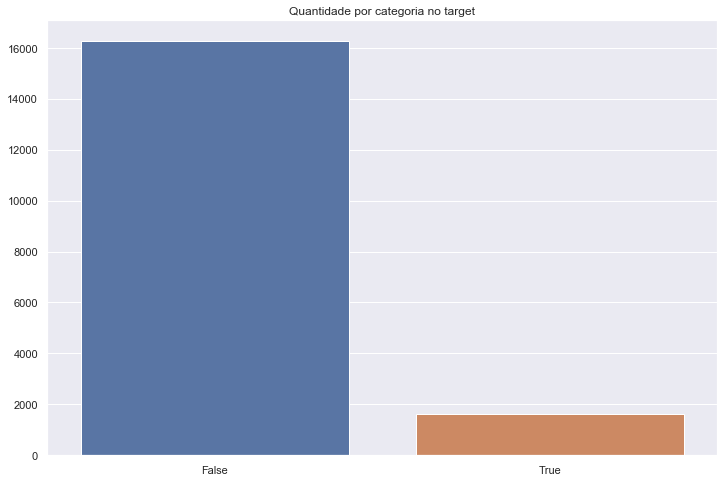

In [26]:
# Counter of target
stars_target_count = stars['target'].value_counts()

# Plot
ax = sns.barplot(x=stars_target_count.index, y=stars_target_count.values)

plt.title('Quantidade por categoria no target')
plt.show()

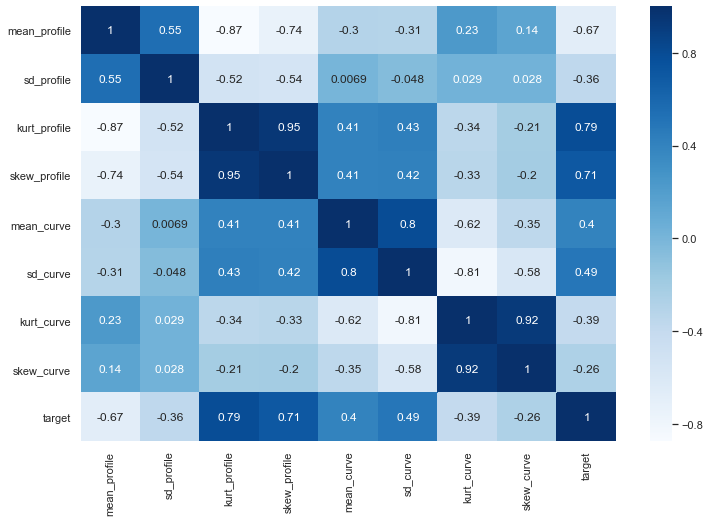

In [22]:
# Plotting correlations
ax = sns.heatmap(stars.corr(), annot=True, cmap='Blues')
plt.show()

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [23]:
def q4():
    false_pulsar_mean_profile = stars.loc[stars['target']==False, 'mean_profile']
    
    false_pulsar_mean_profile_standardized = sct.zscore(false_pulsar_mean_profile)
    
    # Percent point function
    ppf_q80 = sct.norm.ppf(0.80, loc=0, scale=1)
    ppf_q90 = sct.norm.ppf(0.90, loc=0, scale=1)
    ppf_q95 = sct.norm.ppf(0.95, loc=0, scale=1)
    
    # Create the ecdf function with standardized star data
    compute_ecdf_stars = ECDF(false_pulsar_mean_profile_standardized)
    
    return (round(compute_ecdf_stars(ppf_q80), 3),
           round(compute_ecdf_stars(ppf_q90), 3),
           round(compute_ecdf_stars(ppf_q95), 3)
    )

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [24]:
def q5():
    false_pulsar_mean_profile = stars.loc[stars['target']==False, 'mean_profile']
    
    false_pulsar_mean_profile_standardized = sct.zscore(false_pulsar_mean_profile)
    
    # Quartis q1, q2 and q3 stardardized
    ppf_q1 = sct.norm.ppf(0.25, loc=0, scale=1)
    ppf_q2 = sct.norm.ppf(0.50, loc=0, scale=1)
    ppf_q3 = sct.norm.ppf(0.75, loc=0, scale=1)
    
    false_pulsar_mean_profile_standardized_q1 = np.percentile(false_pulsar_mean_profile_standardized, 25)
    false_pulsar_mean_profile_standardized_q2 = np.percentile(false_pulsar_mean_profile_standardized, 50)
    false_pulsar_mean_profile_standardized_q3 = np.percentile(false_pulsar_mean_profile_standardized, 75)
    
    return (round(false_pulsar_mean_profile_standardized_q1 - ppf_q1, 3),
            round(false_pulsar_mean_profile_standardized_q2 - ppf_q2, 3),
            round(false_pulsar_mean_profile_standardized_q3 - ppf_q3, 3)
    )

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.